<a href="https://colab.research.google.com/github/tiiagoo321/mentoria_github/blob/main/Exercicio_regressao_linear_simples_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [4]:
#Importando arquivos
aprovacao = pd.read_excel("/content/Copia de aprovacao_alunos.xlsx")
aprovacao.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [5]:
aprovacao.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [6]:
# Vendo se á nulos
aprovacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


Analise exploratória

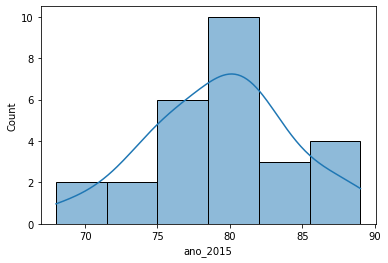

In [7]:
## Utilizando o histograma para ver a normalidade
sns.histplot(aprovacao, x="ano_2015", kde=True)

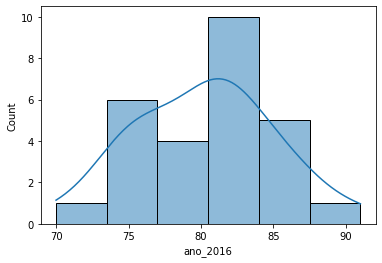

In [39]:
sns.histplot(aprovacao, x="ano_2016", kde=True)

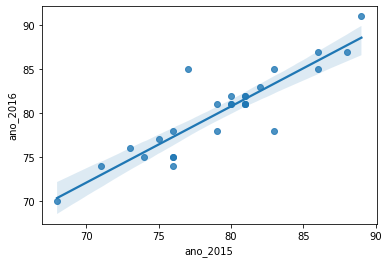

In [40]:
sns.regplot(x="ano_2015", y="ano_2016", data=aprovacao)

In [9]:
aprovacao.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


ESTATISTICA

Utilizando medida de normalização e aplicar uma transformação dentro do dataset para trazer os dados na escala de 0 ate 1

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
from tables import Column
aprova_norm = pd.DataFrame(scaler.fit_transform(aprovacao), index=aprovacao.index, columns=aprovacao.columns)

In [13]:
aprova_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [14]:
aprova_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


Fazendo analise exploratório com o data imoveis_norm para ver como ficou

Rodar o modelo

In [43]:
import statsmodels.formula.api as smf

In [44]:
## Informações para ver o p value
function = "ano_2016~ano_2015 - 1"
model = smf.ols(formula=function, data=aprovacao).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.397e+04
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                    4.76e-42
Time:                        11:11:12   Log-Likelihood:                         -59.863
No. Observations:                  27   AIC:                                      121.7
Df Residuals:                      26   BIC:                                      123.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
## Treinando o modelo propriamente dito

In [33]:
x  = aprova_norm[["ano_2015"]]

y  = aprova_norm[["ano_2016"]]

In [45]:
#Separando os dados de Treino e Teste
## Fazendo o test em 20% = test_size=0.20 o random é a aleatoriedade ou amostras aleatórias
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_treino, y_treino)
LinearRegression()

LinearRegression()

Metricas

In [46]:
r_sq = lr.score(x_treino, y_treino)
print(r_sq)

0.8800910056640281


In [36]:
## Médidas do treino - numéricas
## Comparar o quanto treino preditivo esta distante do y de treino original que é o y_treino
y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


Medidas de test

In [47]:
lr.fit(x_teste, y_teste)

LinearRegression()

In [48]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.08998515473335626
MSE: 0.014620503143970094
RMSE: 0.12091527258361573
